1. Познакомьтесь с данными.
2. Осуществите предобработку данных.
    - 2.1 Приведите заголовки к удобному виду.
    - 2.2 Проверьте типы данных.
    - 2.3 Обработайте пропуски.
    - 2.4 Проверьте наличие дубликатов.
    - 2.5 Исключите нулевые значения в выручке для дальнейшего исследования.
3. Исследовательский анализ данных:
     - 3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.
     - 3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.
     - 3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.
     - 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.
     - 3 .5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета:
     https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
     - 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

Каждый пункт исследования сопроводите выводами.


In [2]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st

# Предобработка данных

In [4]:
df = pd.read_csv('air_data lokteva.csv', sep=';') #имортируем датасет
df.head() #посмотрим первые 5 значений

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE


In [5]:
df.columns = df.columns.str.capitalize() #приведем заголовки к удобному виду
df.columns = df.columns.str.replace('Ffp_flag', 'FFP_flag')
df

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11 00:00:00,2022-06-22 00:00:00,CHD,480,MOW,OMS,ВВЛ,NaN,ONLINE
49996,2022-06-06 00:00:00,2022-06-20 00:00:00,AD,270,LED,MOW,ВВЛ,NaN,OFFLINE
49997,2022-06-26 00:00:00,2022-06-29 00:00:00,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49998,2022-06-26 00:00:00,2022-06-28 00:00:00,AD,270,KZN,MOW,ВВЛ,NaN,OFFLINE


In [6]:
df.info() #проверим тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Issue_date         50000 non-null  object
 1   Flight_date_loc    50000 non-null  object
 2   Pax_type           50000 non-null  object
 3   Revenue_amount     50000 non-null  int64 
 4   Orig_city_code     49998 non-null  object
 5   Dest_city_code     49999 non-null  object
 6   Route_flight_type  50000 non-null  object
 7   FFP_flag           19398 non-null  object
 8   Sale_type          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


Столбцы с датой можно перевести в datatime

In [7]:
#изменим тип данных первых двух столбцов на datatime

df['Issue_date'] = pd.to_datetime(df['Issue_date'])
df['Flight_date_loc'] = pd.to_datetime(df['Flight_date_loc'])

df.info() #проверим тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Issue_date         50000 non-null  datetime64[ns]
 1   Flight_date_loc    50000 non-null  datetime64[ns]
 2   Pax_type           50000 non-null  object        
 3   Revenue_amount     50000 non-null  int64         
 4   Orig_city_code     49998 non-null  object        
 5   Dest_city_code     49999 non-null  object        
 6   Route_flight_type  50000 non-null  object        
 7   FFP_flag           19398 non-null  object        
 8   Sale_type          50000 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.4+ MB


Имеем пропуски в столбцах Orig_city_code, Dest_city_code, FFP_flag

In [8]:
#обработаем пропуски по столбцу FFP_flag, заменив отсутствующие значения на Not - отсутствие программы лояльности
df['FFP_flag'] = df['FFP_flag'].fillna('Not')
df

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,Not,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,Not,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,Not,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,Not,ONLINE
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,Not,OFFLINE
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,Not,OFFLINE


In [9]:
#удалим пропуски по столбцам Orig_city_code и Dest_city_code, так как их мало
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49997 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Issue_date         49997 non-null  datetime64[ns]
 1   Flight_date_loc    49997 non-null  datetime64[ns]
 2   Pax_type           49997 non-null  object        
 3   Revenue_amount     49997 non-null  int64         
 4   Orig_city_code     49997 non-null  object        
 5   Dest_city_code     49997 non-null  object        
 6   Route_flight_type  49997 non-null  object        
 7   FFP_flag           49997 non-null  object        
 8   Sale_type          49997 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.8+ MB


In [10]:
#проверим количество дубликатов
df.duplicated().sum()

169

In [11]:
#удалим дубликаты
df = df.drop_duplicates()

In [12]:
#посмотрим нулевые значения по выручке
df.query('Revenue_amount == 0')

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type
13,2021-12-05,2022-01-16,INF,0,PEZ,MOW,ВВЛ,Not,OFFLINE
32,2021-12-08,2022-01-11,INF,0,UFA,MOW,ВВЛ,Not,ONLINE
106,2021-12-05,2022-01-08,INF,0,MOW,UFA,ВВЛ,Not,ONLINE
228,2021-12-04,2022-01-07,INF,0,MOW,AER,ВВЛ,Not,ONLINE
288,2021-10-26,2021-11-02,INF,0,MOW,PEZ,ВВЛ,Not,ONLINE
...,...,...,...,...,...,...,...,...,...
49382,2022-04-09,2022-05-01,INF,0,OVB,AER,ВВЛ,Not,ONLINE
49417,2022-04-01,2022-05-17,INF,0,MOW,KZN,ВВЛ,Not,ONLINE
49482,2021-12-16,2021-12-16,AD,0,OVB,MOW,ВВЛ,Not,OFFLINE
49690,2022-04-15,2022-05-15,INF,0,NYM,MOW,ВВЛ,Not,OFFLINE


In [13]:
#удалим нулевые значения по выручке
df = df[df.Revenue_amount != 0]

In [14]:
#обновим индексы
df = df.reset_index(drop=True)

# Исследовательский анализ данных

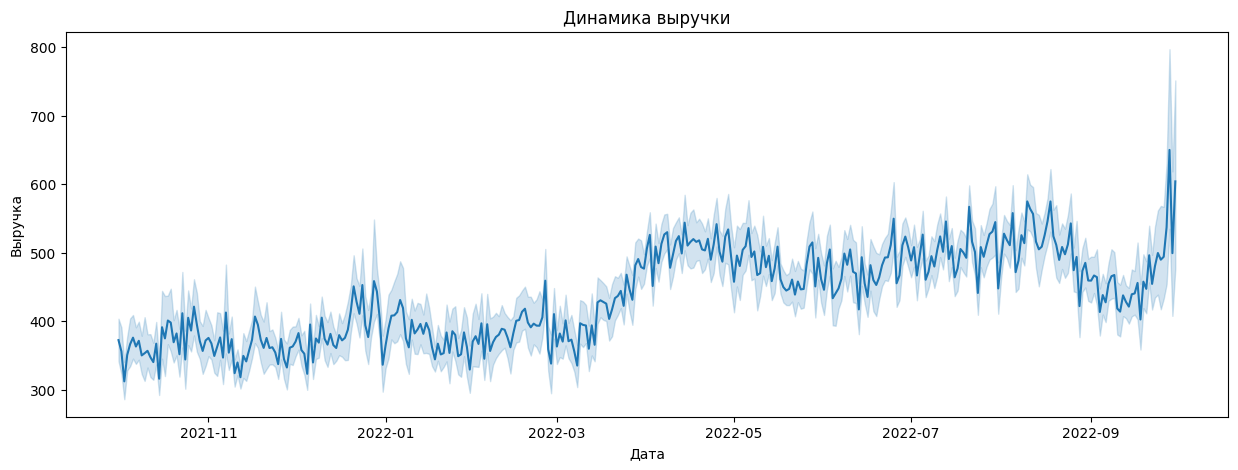

In [15]:
#построим график динамики выручки по дням
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Issue_date', y='Revenue_amount').set(xlabel='Дата',
                                                                ylabel='Выручка',
                                                                title='Динамика выручки')
plt.show()

Очевиден рост выручки за год. Рост выручки произошел в апреле-мае 2022 года. Однако не очень удобно анализировать данные по дням, поэтому проанализируем детально по месяцам.

In [1]:
data['date'] = pd.to_datetime(data['date'])
otch = df.pivot_table(df, index=['date'], aggfunc = 'sum') #отчет по динамике выручки
otch = otch.resample('M').sum() #детализиуем динамику по месяцам
otch

NameError: name 'pd' is not defined

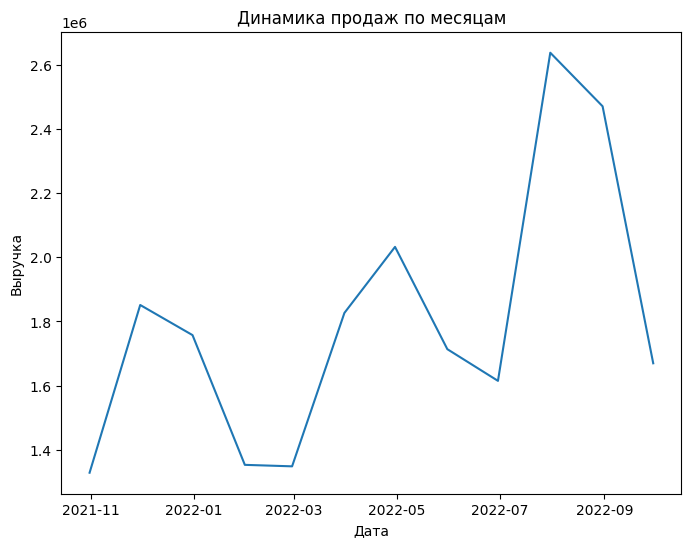

In [17]:
#начертим линейный график с детализацией по месяцам
#установим размер фигуры
plt.figure(figsize=(8, 6))

#построим линейный график
plt.plot(otch)
plt.title('Динамика продаж по месяцам')
plt.xlabel('Дата')
plt.ylabel('Выручка')

#выведем график
plt.show()

Теперь видим скачки выручки в декабре 2021, мае и августе 2022 года.

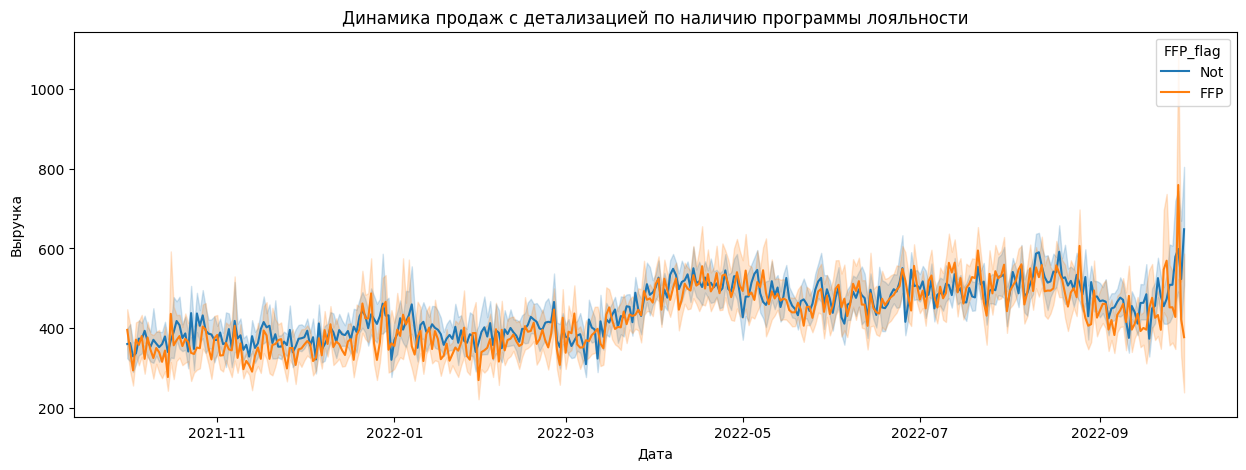

In [18]:
#детализируем данные по выручке по данным о наличии программы лояльности
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Issue_date', y='Revenue_amount', hue='FFP_flag').set(xlabel='Дата',
                                                                ylabel='Выручка',
                                                                title='Динамика продаж с детализацией по наличию программы лояльности')
plt.show()

Мало какие выводы можно сделать по данному графику, поэтому детализируем по месяцам.

In [19]:
#детализируем отчет, выделив отдельно тех, у кого есть программа лояльности и у кого нет по месяцам
otch_1 = df.pivot_table(index='Issue_date', columns='FFP_flag', values='Revenue_amount', aggfunc = 'sum')
otch_1.columns = ['FFP', 'not']
otch_1 = otch_1.resample('M').sum()#детализируем по месяцам
otch_1

,FFP,not
Issue_date,,
2021-10-31,502030,825810
2021-11-30,735100,1116160
2021-12-31,721010,1036240
2022-01-31,538540,813850
2022-02-28,499240,848530
2022-03-31,801360,1025070
2022-04-30,764880,1267690
2022-05-31,649520,1063840
2022-06-30,590920,1023580


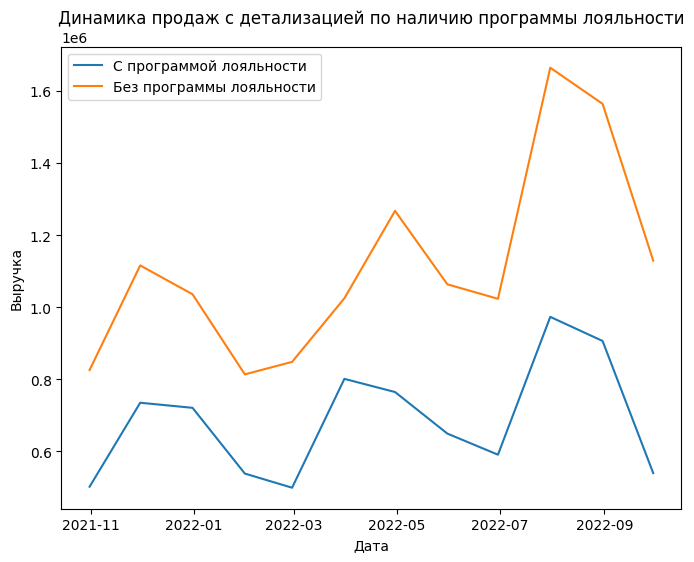

In [20]:
#начертим линейный график
#установим размер фигуры
plt.figure(figsize=(8, 6))

#построим линейный график
plt.plot(otch_1)
plt.title('Динамика продаж с детализацией по наличию программы лояльности')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend(['С программой лояльности','Без программы лояльности'])

#выведем график
plt.show()

Здесь уже видим, что выручка от клиентов без программы лояльности, очевидно, опказалось большей во все периоды, однако динамика  в целом не отличается, то есть независимо от наличия программы лояльности, выручка растет и падает одинаково.

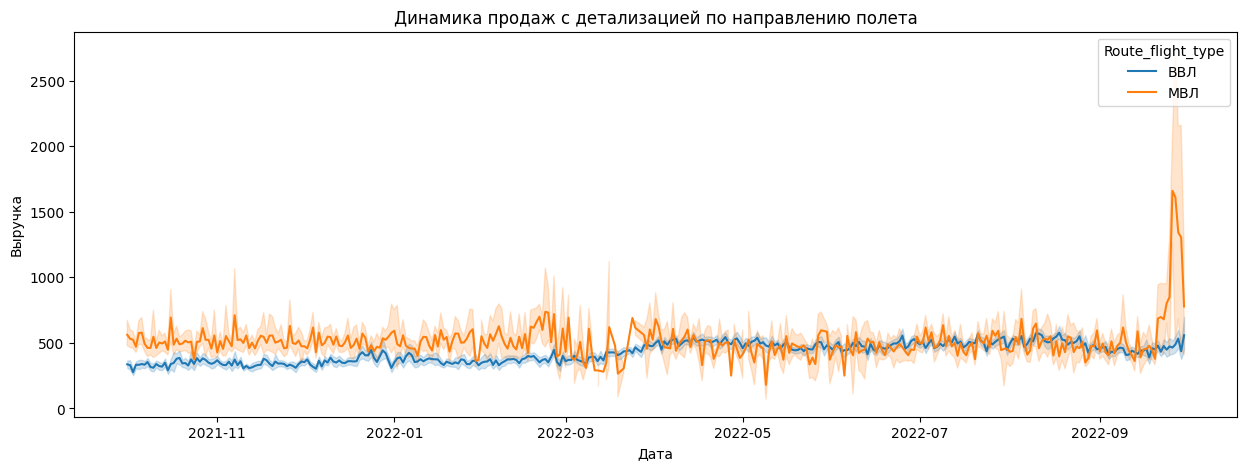

In [21]:
#детализируем данные по выручке по данным о направлении полета
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Issue_date', y='Revenue_amount', hue='Route_flight_type').set(xlabel='Дата',
                                                                ylabel='Выручка',
                                                                title='Динамика продаж с детализацией по направлению полета')
plt.show()

Опять же, сложно сделать выводы по данному графику. Можно лишь увидеть, что в марте 2022 выручка от полетов на ВВЛ и МВЛ примерно сравнялась, когда до этого МВЛ занимало большую долю в выручке компании.

In [22]:
#детализируем отчет, выделив отдельно внутренние и медународные рейсы по месяцам
otch_2 = df.pivot_table(df, index=['Issue_date'], columns=['Route_flight_type'], aggfunc='sum')
otch_2.columns = ['ВВЛ', 'МВЛ']
otch_2 = otch_2.resample('M').sum()#детализируем по месяцам
otch_2

<ipython-input-22-78e6238173d4>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  otch_2 = df.pivot_table(df, index=['Issue_date'], columns=['Route_flight_type'], aggfunc='sum')


,ВВЛ,МВЛ
Issue_date,,
2021-10-31,1039020.0,288820.0
2021-11-30,1528990.0,322270.0
2021-12-31,1452480.0,304770.0
2022-01-31,1152790.0,199600.0
2022-02-28,1173370.0,174400.0
2022-03-31,1789040.0,37390.0
2022-04-30,1926430.0,106140.0
2022-05-31,1635180.0,78180.0
2022-06-30,1523810.0,90690.0


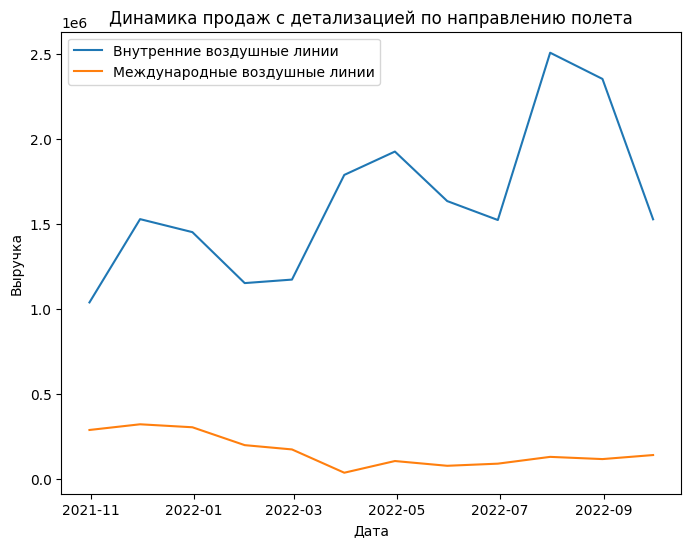

In [23]:
#построим график
#установим размер фигуры
plt.figure(figsize=(8, 6))

#построим линейный график
plt.plot(otch_2)
plt.title('Динамика продаж с детализацией по направлению полета')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend(['Внутренние воздушные линии','Международные воздушные линии'])

#выведем график
plt.show()

Очевидно, полеты на международных воздушных линиях приносят меньшую выручку компании. В марте 2022 года выручка по ним упала и далее оставалсь более менее стабильной. Заметны также колебания по внутренним воздушным линиям, которые приносят компании существенно больший доход. Имеются пики по выручке в декабре 2021, мае и августе 2022. Динамика по МВЛ не соответствует динамике по ВВЛ и в целом динамке общей выручки и остается достаточно стабильной.

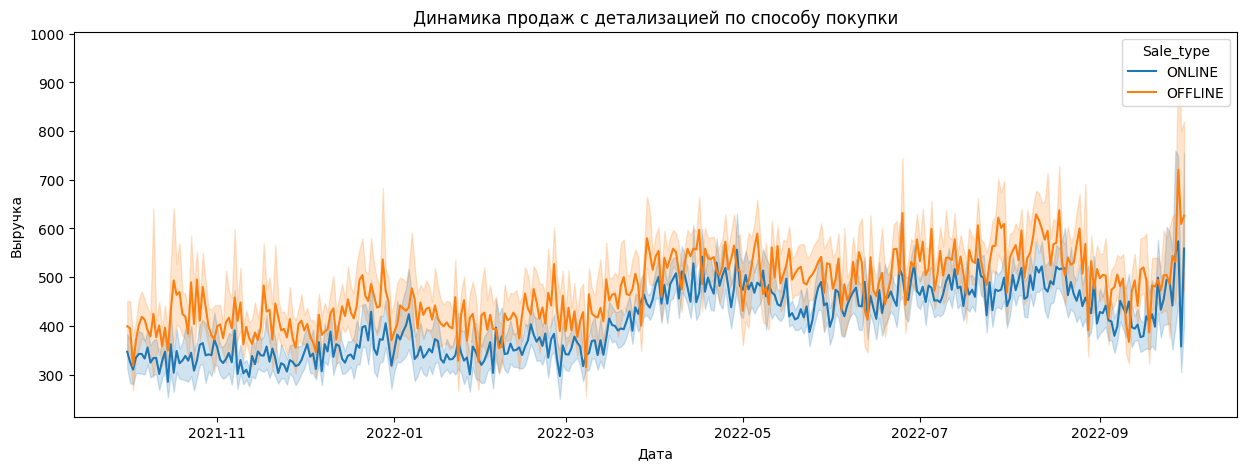

In [24]:
#детализируем данные по выручке по данным о способе покупки
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Issue_date', y='Revenue_amount', hue='Sale_type').set(xlabel='Дата',
                                                                ylabel='Выручка',
                                                                title='Динамика продаж с детализацией по способу покупки')
plt.show()

In [25]:
#детализируем отчет, выделив отдельно онлайн и офлайн покупки по месяцам
otch_3 = df.pivot_table(df, index=['Issue_date'], columns=['Sale_type'], aggfunc='sum')
otch_3.columns = ['Offline', 'Online']
otch_3 = otch_3.resample('M').sum() #детализируем по месяцам
otch_3

<ipython-input-25-bf96cde296bd>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  otch_3 = df.pivot_table(df, index=['Issue_date'], columns=['Sale_type'], aggfunc='sum')


,Offline,Online
Issue_date,,
2021-10-31,649640,678200
2021-11-30,901140,950120
2021-12-31,853050,904200
2022-01-31,623900,728490
2022-02-28,670260,677510
2022-03-31,796020,1030410
2022-04-30,1035090,997480
2022-05-31,743570,969790
2022-06-30,753650,860850


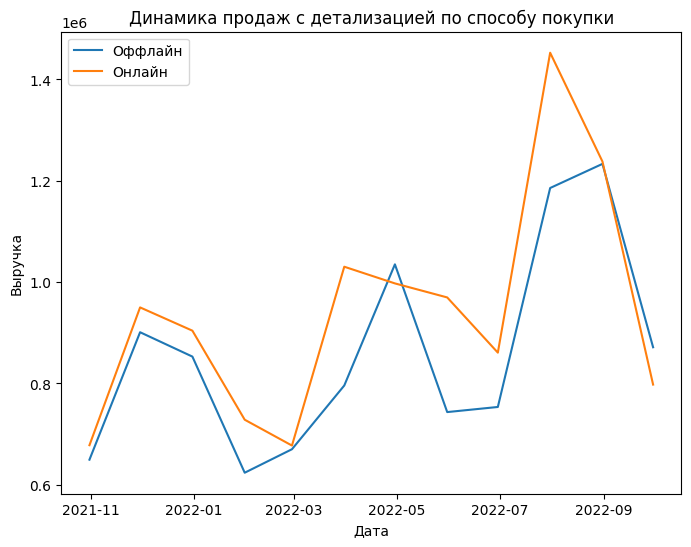

In [26]:
#построим график
#установим размер фигуры
plt.figure(figsize=(8, 6))

#построим линейный график
plt.plot(otch_3)
plt.title('Динамика продаж с детализацией по способу покупки')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend(['Оффлайн','Онлайн'])

#выведем график
plt.show()

Динамика выручки по онлайн и офлайн покупкам совпадает. Онлайн покупки в некоторые периоды приносят значительно больше выручки, чем оффлайн - декабрь 2021 и август 2022.

# Составим общие отчеты

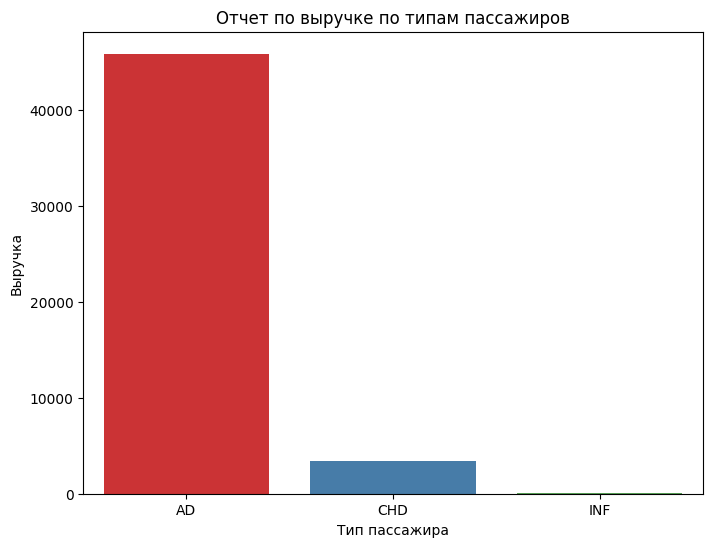

In [27]:
#общий отчет по выручке по типам пассажиров

#зададим размер фигуры
plt.figure(figsize=(8, 6))

#построим столбчатую диаграмму
sns.countplot(data=df, x='Pax_type', palette='Set1')

#добавьте названия и подписи осей
plt.xlabel('Тип пассажира')
plt.ylabel('Выручка')
plt.title('Отчет по выручке по типам пассажиров')

plt.show()

Видим, что больше всего выручки приносят взрослые пассажиры, дети приносят незначительную долю, младенцы же - совсем неощутимую.

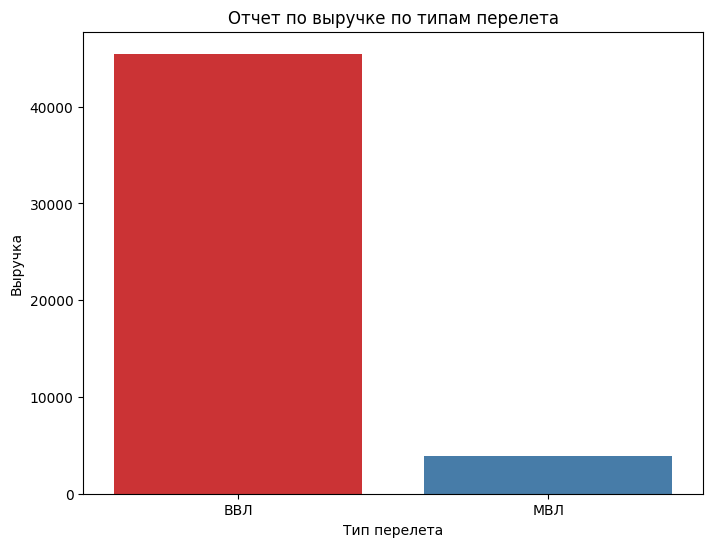

In [ ]:
#общий отчет по выручке по типам перелета

#зададим размер фигуры
plt.figure(figsize=(8, 6))

#построим столбчатую диаграмму
sns.countplot(data=df, x='Route_flight_type', palette='Set1')

#добавьте названия и подписи осей
plt.xlabel('Тип перелета')
plt.ylabel('Выручка')
plt.title('Отчет по выручке по типам перелета')

plt.show()

Видим значительное превышение количества выручки по внутренним воздушным линиям над международными.

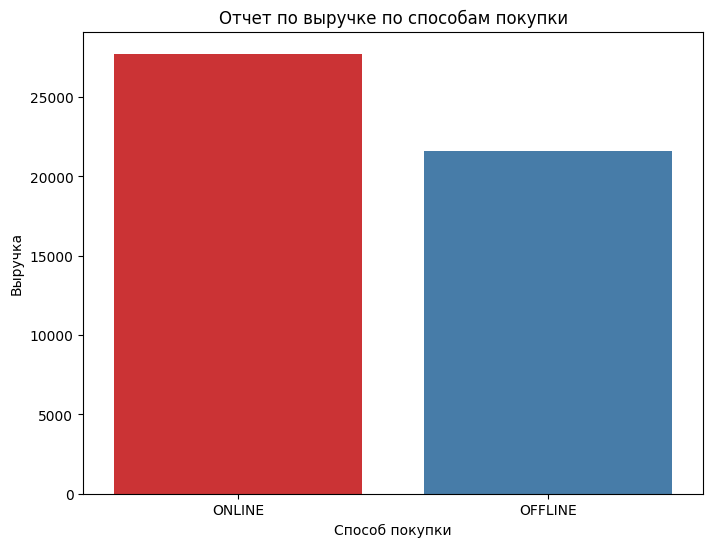

In [28]:
#общий отчет по выручке по способам покупки

#зададим размер фигуры
plt.figure(figsize=(8, 6))

#построим столбчатую диаграмму
sns.countplot(data=df, x='Sale_type', palette='Set1')

#добавьте названия и подписи осей
plt.xlabel('Способ покупки')
plt.ylabel('Выручка')
plt.title('Отчет по выручке по способам покупки')

plt.show()

Выручка от онлайн и оффлайн покупок почти однаковая, однако онлайн покупки все же приносят больше выручки.

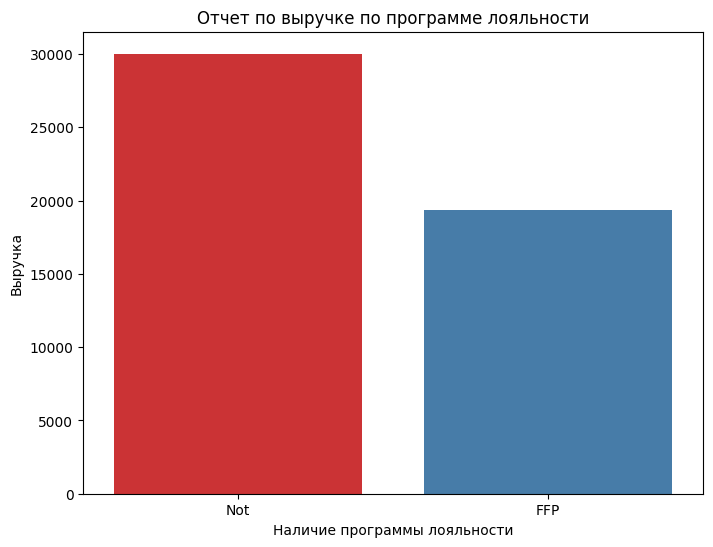

In [29]:
#общий отчет по выручке по программе лояльности

#зададим размер фигуры
plt.figure(figsize=(8, 6))

#построим столбчатую диаграмму
sns.countplot(data=df, x='FFP_flag', palette='Set1')

#добавьте названия и подписи осей
plt.xlabel('Наличие программы лояльности')
plt.ylabel('Выручка')
plt.title('Отчет по выручке по программе лояльности')

plt.show()

Из графика можем сделать вывод, что больше выручки компании приносят пассажиры без программы лояльности, чем те, кто ей пользуется.

# Анализ выбросов

<Axes: >

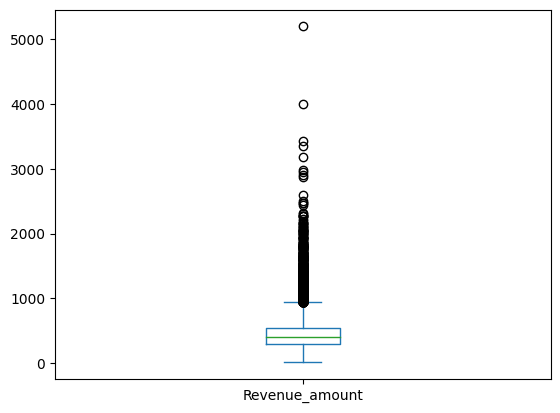

In [30]:
#построим коробку с усами, чтобы проанализировать выбросы
df['Revenue_amount'].plot.box()

Устраним выбросы

In [31]:
#установим границы для определения выбросов с помощью интерквартильного размаха
total_stat = df.describe() #переменная с данными о статистике
q3 = total_stat['Revenue_amount']['75%'] #3 квантиль
q1 = total_stat['Revenue_amount']['25%'] #1 квантиль

iqr = q3-q1 #межквартальный размах
iqr_min = q1 - 1.5*iqr #нижняя граница выбросов
iqr_max = q3 +1.5*iqr #верхняя граница выбросов

In [32]:
df = df[df['Revenue_amount']<=iqr_max] #новый датасет без выбросов

# Исследование выручки по сезонам

In [54]:
#создадим новый столбец, куда внесем данные по четвертям года (сезонам)
df['Season'] = df['Issue_date'].dt.quarter
df['Season'] = df['Season'].astype(str)

#создадим сводную таблицу с данными о выручке по сезонам
season = df.pivot_table(df, index=['Season'], aggfunc='count')

#сделаем таблицу красивой
words = ['Winter', 'Spring', 'Summer', 'Autumn'] #названия сезонов
season.set_index(pd.Index(words), inplace=True)

season = season['Revenue_amount']
season

Winter    11241
Spring    10737
Summer    13219
Autumn    13178
Name: Revenue_amount, dtype: int64

<Axes: >

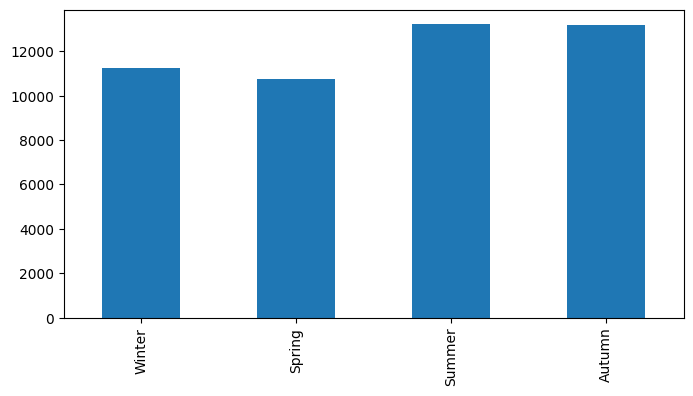

In [55]:
season.plot(kind = 'bar',figsize=(8, 4)) #построим столбчатую диаграмму

Видим, что суммарная выручка больше всего летом, меньше всего - зимой.

In [56]:
#также проанализируем средние значения по выручке в разные сезоны
#создадим сводную таблицу с данными о средней выручке по сезонам
season = df.pivot_table(df, index=['Season'], aggfunc='mean')

#сделаем таблицу красивой
season.set_index(pd.Index(words), inplace=True)

season

<ipython-input-56-c471bb8d8210>:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  season = df.pivot_table(df, index=['Season'], aggfunc='mean')


,Revenue_amount
Winter,387.976159
Spring,477.272981
Summer,469.919056
Autumn,357.703749


# Проверка гипотезы о равенстве выручки зимой и осенью

In [57]:
#создадим переменные для проверки гипотезы
winter = df['Revenue_amount'].loc[(df['Season'] == '1')].tolist() #выручка зимой
autumn = df['Revenue_amount'].loc[(df['Season'] == '4')].tolist() #выручка осенью

Для начала проверим на нормальность с помощью Q-Q plot

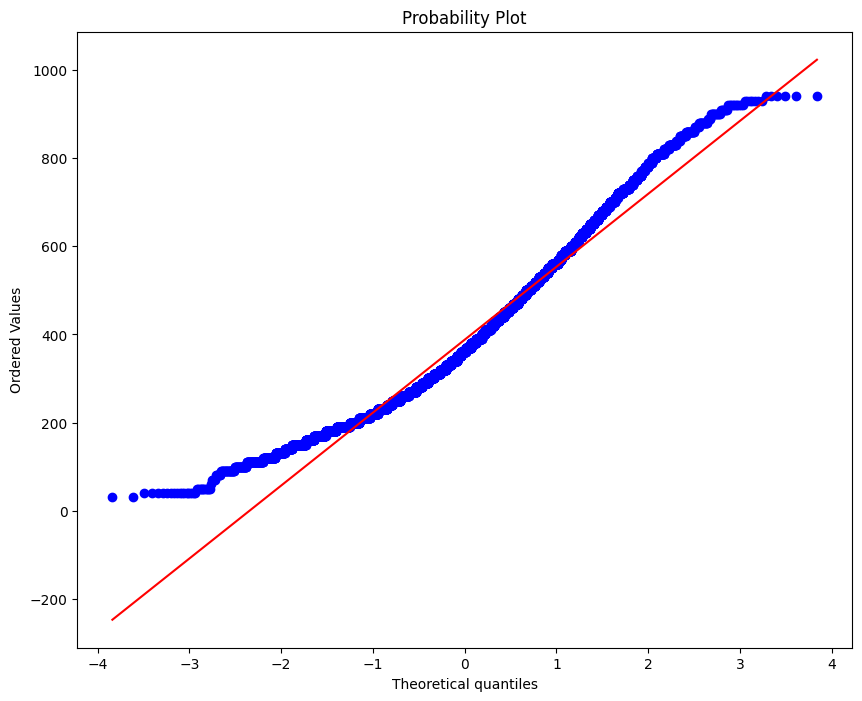

In [58]:
#сначала проверим выборку с данными по зиме
plt.figure(figsize = (10, 8))

# построение Q-Q plot
st.probplot(winter, dist='norm', plot=plt)
plt.show()

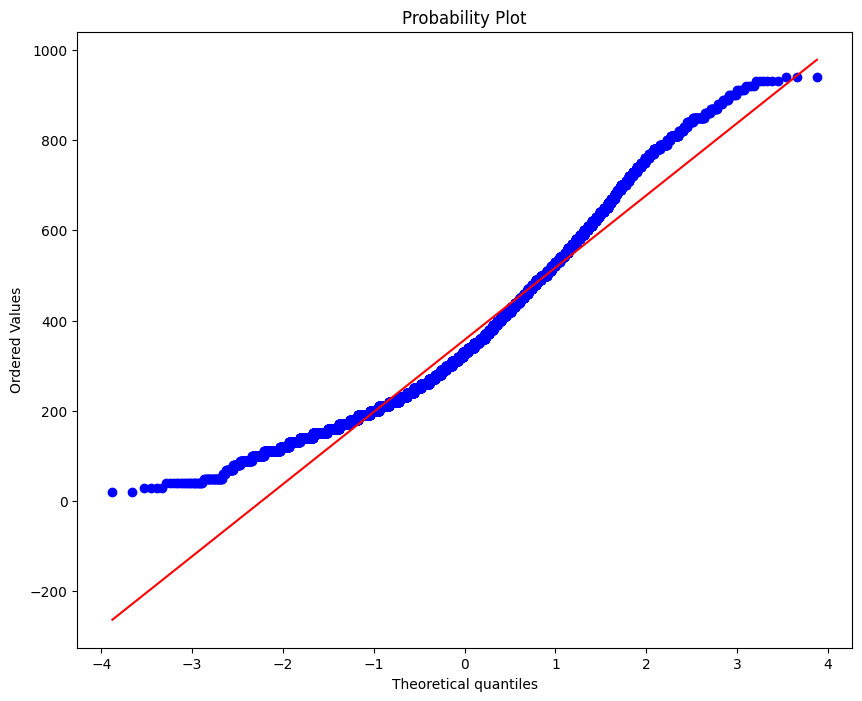

In [59]:
#теперь проверим выборку по осени
plt.figure(figsize = (10, 8))

# построение Q-Q plot
st.probplot(autumn, dist='norm', plot=plt)
plt.show()

Видим, что распределение ненормально в обоих случаях, поэтому использовать ttest не можем, используем непараметрический тест Уилкоксона-Манна-Уитни

In [60]:
#H0: выручка зимой и осенью одинакова
#H1: выручка зимой и осенью различна

alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(winter, autumn)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-value: 8.569833158420644e-49
Следует отвергнуть нулевую гипотезу


Отвергаем нулевую гипотезу о равенстве выручки за осень и зиму, следовательно выручки имеют статистически значимые отличия.

# Зависимости выручки от числа продаж

In [61]:
#создадим сводную таблицу с данными о выручке и количеству продаж по месяцам
otch_d = df.pivot_table(df, index=['Issue_date'], aggfunc = 'sum') #отчет по динамике выручки
otch_c = df.pivot_table(index=['Issue_date'], aggfunc = 'count', values = 'Revenue_amount') #отчет о количестве продаж
month = otch_d.merge(otch_c, on = 'Issue_date') #объединим два отчета
month = month.resample('M').sum() #детализиуем динамику по месяцам
month.columns = ['Revenue_amount', 'Sales_amount']
month

<ipython-input-61-740aa0081281>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  otch_d = df.pivot_table(df, index=['Issue_date'], aggfunc = 'sum') #отчет по динамике выручки


,Revenue_amount,Sales_amount
Issue_date,,
2021-10-31,1280870,3579
2021-11-30,1766940,5109
2021-12-31,1666010,4490
2022-01-31,1304090,3552
2022-02-28,1297190,3414
2022-03-31,1759960,4275
2022-04-30,1934200,3887
2022-05-31,1651680,3563
2022-06-30,1538600,3287


In [62]:
#проверим корреляцию выручки от количества продаж
print(month['Revenue_amount'].corr(month['Sales_amount']))

0.7531341970310438


Имеем очень высокую, положительную связь, следовательно выручка от продаж напрямую зависит от количества продаж.

# Исследование данных о том, насколько заранее покупается билет

In [79]:
#добавим столбец с информацией о том, сколько времени прошло с покупки до совершения перелета
df['Time'] = df['Flight_date_loc'] - df['Issue_date']
df['Time']

0       35 days
1        3 days
2       37 days
3       28 days
4       35 days
          ...  
49357   11 days
49358   14 days
49359    3 days
49360    2 days
49361   16 days
Name: Time, Length: 48375, dtype: timedelta64[ns]

In [80]:
#поделим на группы по тому, насколько заранее куплен билет
delta = (df['Time'].max() - df['Time'].min()) / 3    #интервал для деления на 3 группы
delta

Timedelta('105 days 16:00:00')

Разделим на группы: менее 105 дней, 105-210 дней и более 210 дней.

In [65]:
#создадим функцию с условиями для проверки группы
def conditions(x):
    if x<delta:
        return "1"
    elif x>delta and x<=delta*2:
        return "2"
    else:
        return '3'

df['Time_group'] = df['Time'].apply(conditions) #применим условия и создадим столбец с группами

В данном случае имеем группу 1 - менее 105 дней заранее, группу 2 - от 105 до 210 дней, группу 3 - более 210 дней между покупкой и перелетом. Далее визуализируем полученные данные.

In [66]:
#сделаем сводную таблицу с данными по выделенным группам
time = df.pivot_table(index='Time_group', aggfunc=['sum', 'count', 'mean'], values='Revenue_amount')
time.columns = ['sum', 'count', 'mean']
words = ['<105 days', '105-210 days', '>210 days']
time.set_index(pd.Index(words), inplace=True)
time

,sum,count,mean
<105 days,19760510,46963,420.767626
105-210 days,596600,1288,463.198758
>210 days,54290,124,437.822581


# Проверка гипотезы о не равенстве выручки от тех, кто покупает билеты заранее и тех, кто покупает прямо перед вылетом

In [67]:
#создадим переменные для проверки гипотезы
late = df['Revenue_amount'].loc[(df['Time_group'] == '1')].tolist()
early = df['Revenue_amount'].loc[(df['Time_group'] == '3')].tolist()

Также проверим выборки на нормальность

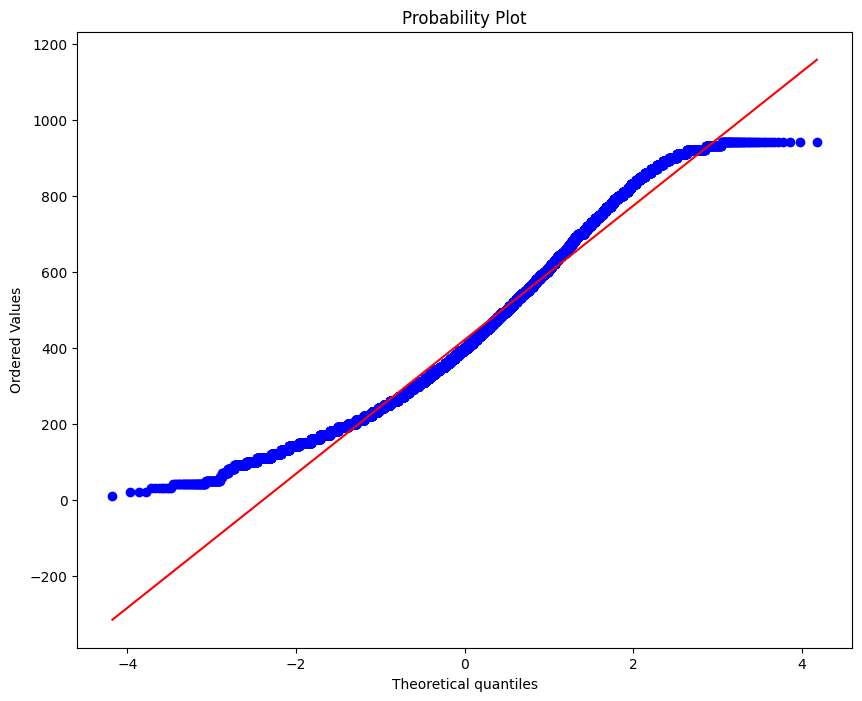

In [68]:
plt.figure(figsize = (10, 8))

# построение Q-Q plot
st.probplot(late, dist='norm', plot=plt)
plt.show()

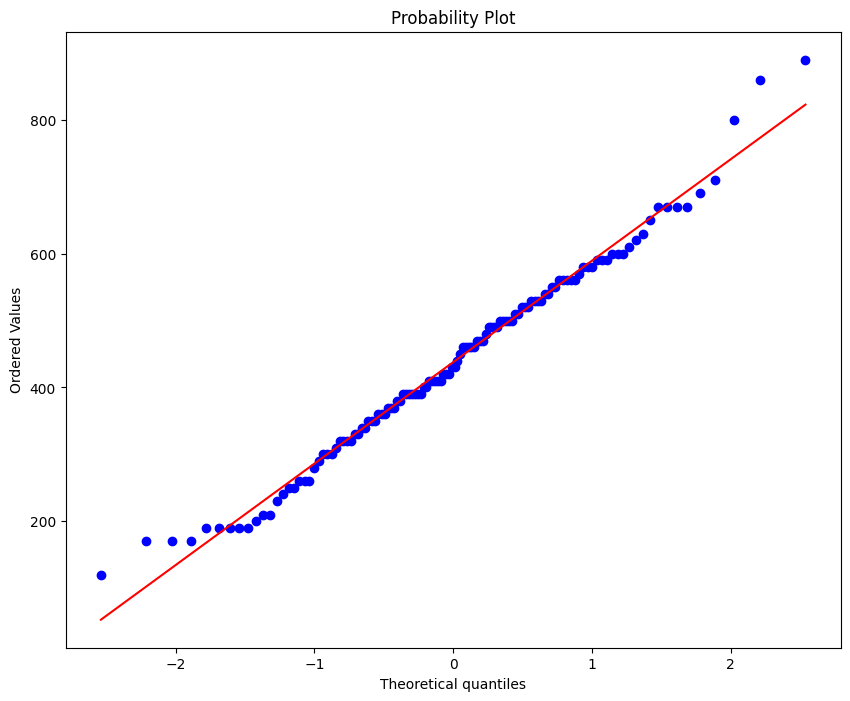

In [69]:
plt.figure(figsize = (10, 8))

# построение Q-Q plot
st.probplot(early, dist='norm', plot=plt)
plt.show()

Видим, что ttest опять же лучше не использовать, распределение ненормально, воспользуемся тестом Уилкоксона-Манна-Уитни

In [70]:
#H0: выручка от "ранних" и "поздних" пассажиров одинаковая
#H1: выручка от "ранних" и "поздних" пассажиров различна

alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(late, early)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-value: 0.07949466526760707
Не удалось отвергнуть нулевую гипотезу


Не можем отвергнуть гипотезу о равенстве выручки от двух групп пассажиров, значит она в среднем равна и время бронирования не влияет на выручку компании

Попробуем поделить на группы иначе. Выделим "ранних" пассажиров - которые бронируют за 3 месяца до вылета (>90 дней) и "поздних" - которые бронируют за неделю до вылета (<7 дней)

In [87]:
import datetime
from time import sleep
#создадим функцию для новых групп
def conditions(x):
    if x<datetime.timedelta(days = 7):
        return "1"
    elif x>datetime.timedelta(days = 7) and x<=datetime.timedelta(days = 90):
        return "2"
    else:
        return '3'

df['Time_group'] = df['Time'].apply(conditions) #применим условия и создадим столбец с группами

In [88]:
#сделаем сводную таблицу с данными по выделенным группам
time = df.pivot_table(index='Time_group', aggfunc=['sum', 'count', 'mean'], values='Revenue_amount')
time.columns = ['sum', 'count', 'mean']
words = ['<7 days', '7-90 days', '>90 days']
time.set_index(pd.Index(words), inplace=True)
time

,sum,count,mean
<7 days,7984360,19394,411.692276
7-90 days,10760360,25164,427.609283
>90 days,1666680,3817,436.646581


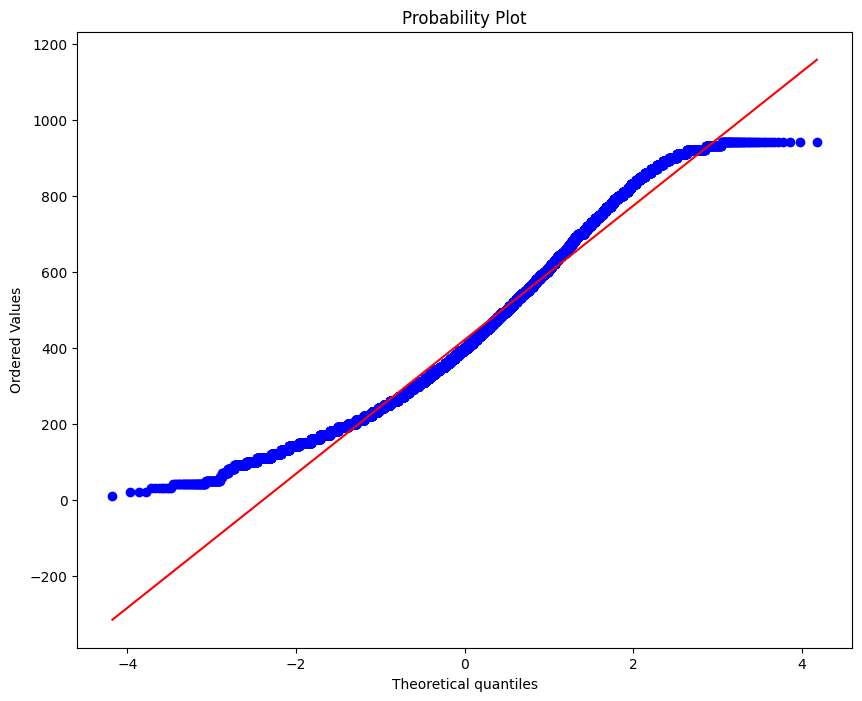

In [89]:
plt.figure(figsize = (10, 8))

# построение Q-Q plot
st.probplot(late, dist='norm', plot=plt)
plt.show()

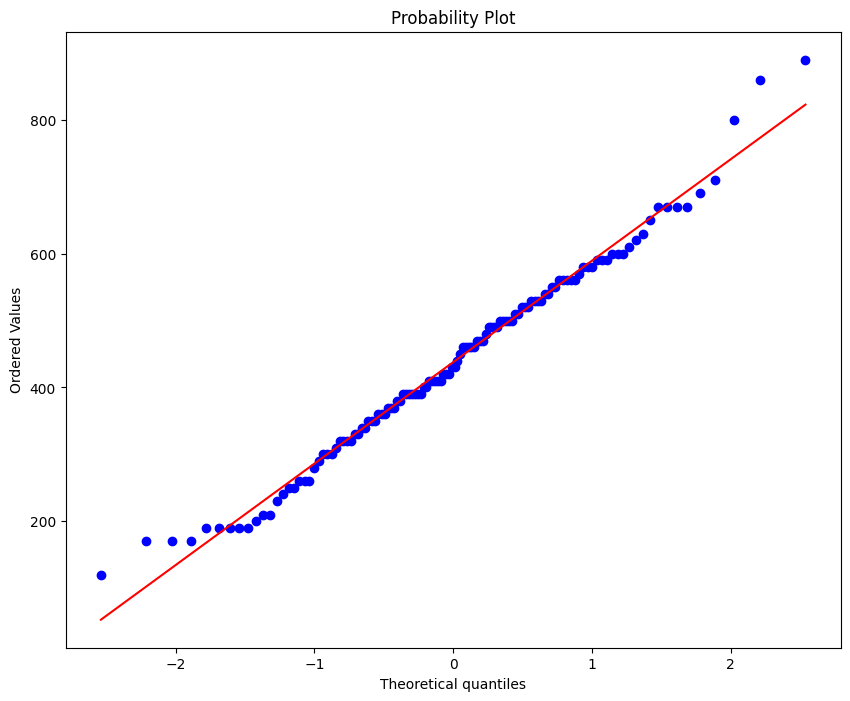

In [90]:
plt.figure(figsize = (10, 8))

# построение Q-Q plot
st.probplot(early, dist='norm', plot=plt)
plt.show()

Видим, что ttest опять же лучше не использовать, распределение ненормально, воспользуемся тестом Уилкоксона-Манна-Уитни

In [91]:
#H0: выручка от "ранних" и "поздних" пассажиров одинаковая
#H1: выручка от "ранних" и "поздних" пассажиров различна

alpha = 0.05 # уровень статистической значимости

results = st.mannwhitneyu(late, early)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-value: 0.07949466526760707
Не удалось отвергнуть нулевую гипотезу


Опять не можем отвергнуть гипотезу о равенстве выручки от двух групп пассажиров, значит она в среднем равна и время бронирования не влияет на выручку компании

# Изучим выручку для различных направлений перелета

In [92]:
#импортируем вспомогаетльную таблицу
help = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', header=None)
help.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.82679,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports


In [93]:
#удалим первый столбец с числами
help = help.drop(0, axis=1)
help.head(3)

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.82679,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports


In [94]:
#переименуем столбцы
help.columns = ['Airport_name', 'Location', 'Country', 'IATA_code', 'IACO_code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DT', 'Timezone_region', 'Type', 'Sourse']

In [95]:
#добавим данные о городах в первую таблицу
orig = set(df['Orig_city_code']) #коды аэропортов города вылета
dist = set(df['Dest_city_code']) #коды аэропортов города приземления

airport = help['IATA_code'] #коды всех аэропортов из вспомогательной таблицы
city = help['Location'] #все города из вспомогательной таблицы
city_dict = dict(zip(airport, city)) #словарь 'код - город'

#добавим данные в изначальную таблицу
df['Orig_city'] = df['Orig_city_code'].map(city_dict)
df['Dest_city']  = df['Dest_city_code'].map(city_dict)
df.head()

,Issue_date,Flight_date_loc,Pax_type,Revenue_amount,Orig_city_code,Dest_city_code,Route_flight_type,FFP_flag,Sale_type,Season,Time,Time_group,Orig_city,Dest_city
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,Not,ONLINE,4,35 days,2,NaN,Kaliningrad
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,Not,OFFLINE,4,3 days,1,Yuzhno-sakhalinsk,Novosibirsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,4,37 days,2,Kaliningrad,NaN
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,Not,ONLINE,4,28 days,2,Voronezh,NaN
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,4,35 days,2,NaN,Krasnodar


Имеем пропуски по городам, проверим их и заполним.

In [96]:
df['Orig_city_code'][df['Orig_city'].isnull()].unique() #по каким кодам отправления есть пропуски

array(['MOW', 'PAR', 'BAK', 'ROM', 'SEL', 'BER', 'GRV', 'NQZ', 'OHH',
       'TOX', 'MIL', 'TYO', 'LON'], dtype=object)

In [97]:
df['Dest_city_code'][df['Dest_city'].isnull()].unique() #по каким кодам прибытия есть пропуски

array(['MOW', 'BAK', 'GRV', 'BER', 'TOX', 'NQZ', 'ROM', 'SEL', 'PAR',
       'LON', 'TYO', 'MIL'], dtype=object)

In [98]:
#дополним словарь недостающими значениями
city_dict['BAK'] = 'Baku'
city_dict['BER'] = 'Berlin'
city_dict['GRV'] = 'Grozny'
city_dict['LON'] = 'London'
city_dict['MIL'] = 'Milan'
city_dict['MOW'] = 'Moskow'
city_dict['NQZ'] = 'Astana'
city_dict['OHH'] = 'Okha'
city_dict['PAR'] = 'Paris'
city_dict['ROM'] = 'Rome'
city_dict['SEL'] = 'Seoul'
city_dict['TOX'] = 'Tobolsk'
city_dict['TYO'] = 'Tokyo'

#снова применим словарь к датафрейму
df['Orig_city'] = df['Orig_city_code'].map(city_dict)
df['Dest_city']  = df['Dest_city_code'].map(city_dict)

In [99]:
#создадим столбец с направлениями перелета
df['From_to'] = df['Orig_city'] + ' - ' + df['Dest_city']

In [100]:
#выведем топ 10 перелетов по внутренним воздушным линиям и проанализируем выручку

#создадим таблицу с количеством перелетов по различным направлениям с данными об общей и средней выручке
vvl = df[df['Route_flight_type'] == 'ВВЛ'].pivot_table(index='From_to', aggfunc=['count', 'sum', 'mean'], values='Revenue_amount').reset_index()
#переименуем столбцы
vvl.columns = ['From_to','Amount', 'Sum', 'Mean']

vvl = vvl.sort_values (by = 'Amount', ascending=False).reset_index(drop=True) #отсортируем по числу перелетов
vvl_top = vvl.head(10) #выведем топ 10
vvl_top

,From_to,Amount,Sum,Mean
0,Sochi - Moskow,1326,513970,387.609351
1,Moskow - Sochi,1292,480480,371.888545
2,St. Petersburg - Moskow,1211,280870,231.932287
3,Moskow - St. Petersburg,1190,273720,230.016807
4,Novosibirsk - Moskow,967,460720,476.442606
5,Moskow - Novosibirsk,944,440440,466.567797
6,Kazan - Moskow,759,205230,270.395257
7,Moskow - Kazan,757,204660,270.356671
8,Moskow - Ufa,708,210610,297.471751
9,Novosibirsk - Sochi,668,382470,572.559880


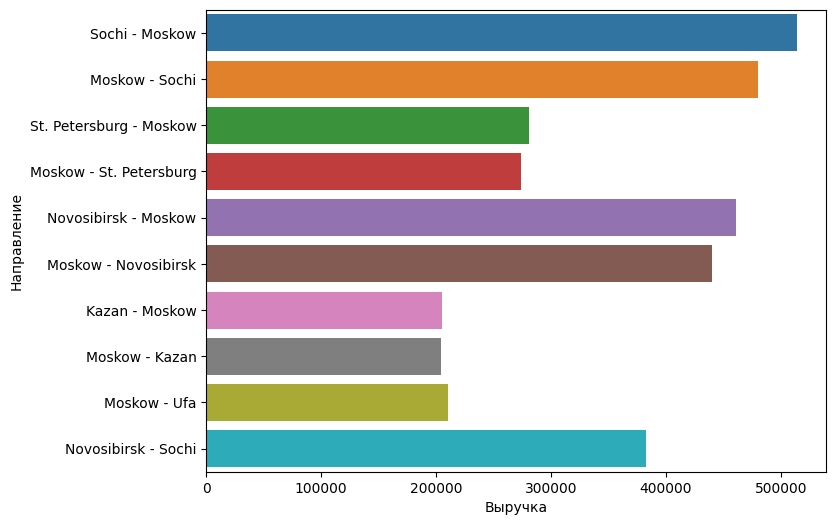

In [101]:
#проиллюстрируем данные
plt.figure(figsize=(8, 6))
sns.barplot(data=vvl_top, y='From_to', x='Sum', orient='h').set(xlabel='Выручка',
                                                                  ylabel='Направление')
plt.show()

Видим, что самое популярное направление приносит больше всего выручки - это Сочи-Москва и обратно. Также среди популярных направлений большую выручку приносят направления Новосибирск-Москва и обратно, а также Новосибирск-Сочи.

In [102]:
#выведем топ 10 перелетов по международным воздушным линиям и проанализируем выручку

#создадим таблицу с количеством перелетов по различным направлениям с данными об общей и средней выручке
mvl = df[df['Route_flight_type'] == 'МВЛ'].pivot_table(index='From_to', aggfunc=['count', 'sum', 'mean'], values='Revenue_amount').reset_index()
#переименуем столбцы
mvl.columns = ['From_to','Amount', 'Sum', 'Mean']

mvl = mvl.sort_values (by = 'Amount', ascending=False).reset_index(drop=True) #отсортируем по числу перелетов
mvl_top = mvl.head(10) #выведем топ 10
mvl_top

,From_to,Amount,Sum,Mean
0,Moskow - Osh,151,68130,451.192053
1,Khudzhand - Moskow,144,95190,661.041667
2,Osh - Moskow,136,80920,595.000000
3,Moskow - Khudzhand,129,57710,447.364341
4,Novosibirsk - Bishkek,120,46980,391.500000
5,Novosibirsk - Osh,119,47450,398.739496
6,Khudzhand - Novosibirsk,116,57740,497.758621
7,Osh - Novosibirsk,115,56980,495.478261
8,Bishkek - Novosibirsk,102,48300,473.529412
9,Moskow - Antalya,101,38080,377.029703


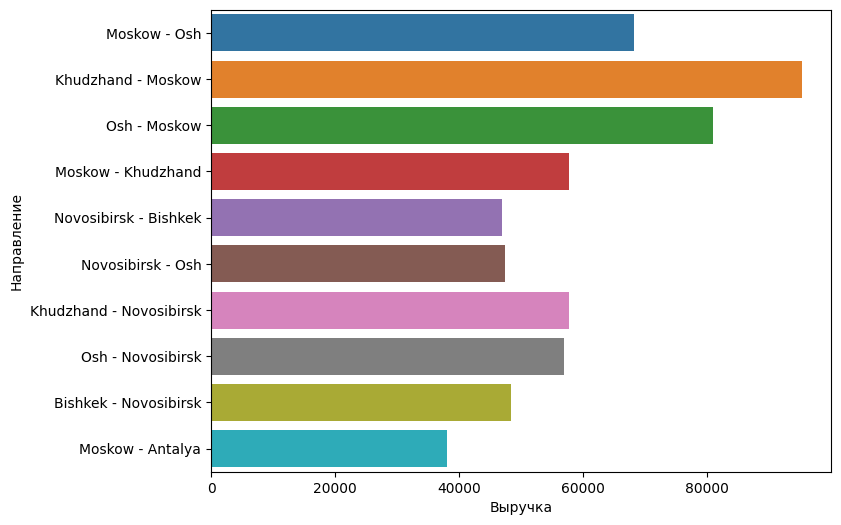

In [103]:
#проиллюстрируем данные
plt.figure(figsize=(8, 6))
sns.barplot(data=mvl_top, y='From_to', x='Sum', orient='h').set(xlabel='Выручка',
                                                                  ylabel='Направление')
plt.show()

Самое популярное направление не приносит самую большую выручку, но в целом тененция такова, что популярные направления достаточно рентабельны и выручку приносят. Самыми успешными для компании являются Худжанд-Москва и Ош-Москва и обратно.

# Исследование звисимости выручки от других признаков

Мы не можем коррелировать нечисловые значения, матрицу корреляций по общей таблице составить нельзя. Проколлерируем выручку по ежемесячным показателям.

In [104]:
#создадим таблицу с общей выручкой и числу клиентов с программой лояльности

#сделаем отчет о динамике выручки
otch_d = df.pivot_table(df, index=['Issue_date'], aggfunc = 'sum') #отчет по динамике выручки

#сделаем отчет о количестве клиентов с программой лояльности
otch_1 = df.pivot_table(index='Issue_date', columns='FFP_flag', values='Revenue_amount', aggfunc = 'count')
otch_1.columns = ['FFP', 'not']
otch_1 = otch_1.drop('not', axis=1)

comp_1 = otch_d.merge(otch_1, on = 'Issue_date') #объединим два отчета
comp_1 = comp_1.resample('M').sum() #детализиуем динамику по месяцам
comp_1

<ipython-input-104-dd049b2eb77a>:4: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  otch_d = df.pivot_table(df, index=['Issue_date'], aggfunc = 'sum') #отчет по динамике выручки


,Revenue_amount,FFP
Issue_date,,
2021-10-31,1280870,1406
2021-11-30,1766940,2136
2021-12-31,1666010,1898
2022-01-31,1304090,1493
2022-02-28,1297190,1312
2022-03-31,1759960,1888
2022-04-30,1934200,1476
2022-05-31,1651680,1383
2022-06-30,1538600,1202


In [105]:
#проверим корреляцию выручки от количества клиентов с программой лояльности
print(comp_1['Revenue_amount'].corr(comp_1['FFP']))

0.5161576192429668


Имеем среднюю положительную связь, то есть выручка зависит от числа билетов, проданных клиентам с программой лояльности всего на 52%, что не очень много, но существенно.

In [106]:
#создадим таблицу с общей выручкой и числом онлайн продаж

#сделаем отчет о динамике выручки
otch_d = df.pivot_table(df, index=['Issue_date'], aggfunc = 'sum') #отчет по динамике выручки

#сделаем отчет о количестве онлайн продаж
otch_2 = df.pivot_table(index='Issue_date', columns='Sale_type', values='Revenue_amount', aggfunc = 'count')
otch_2.columns = ['Offline', 'Online']
otch_2 = otch_2.drop('Offline', axis=1)

comp_2 = otch_d.merge(otch_2, on = 'Issue_date') #объединим два отчета
comp_2 = comp_2.resample('M').sum() #детализиуем динамику по месяцам
comp_2

<ipython-input-106-1d2979bd5295>:4: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  otch_d = df.pivot_table(df, index=['Issue_date'], aggfunc = 'sum') #отчет по динамике выручки


,Revenue_amount,Online
Issue_date,,
2021-10-31,1280870,2014
2021-11-30,1766940,2909
2021-12-31,1666010,2534
2022-01-31,1304090,2080
2022-02-28,1297190,1871
2022-03-31,1759960,2588
2022-04-30,1934200,2019
2022-05-31,1651680,2168
2022-06-30,1538600,1839


In [107]:
#проверим корреляцию выручки от числа онлайн продаж
print(comp_2['Revenue_amount'].corr(comp_2['Online']))

0.6959455456254842


Имеем достаточно высокую положительную связь, то есть выручка зависит от онлайн продаж на 70%, что досточно существенно.

In [108]:
#создадим таблицу с общей выручкой и числом внутренних рейсов

#сделаем отчет о динамике выручки
otch_d = df.pivot_table(df, index=['Issue_date'], aggfunc = 'sum') #отчет по динамике выручки

#сделаем отчет о количестве внутренних рейсов
otch_3 = df.pivot_table(index='Issue_date', columns='Route_flight_type', values='Revenue_amount', aggfunc = 'count')
otch_3.columns = ['ВВЛ', 'МВЛ']

comp_3 = otch_d.merge(otch_3, on = 'Issue_date') #объединим два отчета
comp_3 = comp_3.resample('M').sum() #детализиуем динамику по месяцам
comp_3

<ipython-input-108-dd465397eb8c>:4: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  otch_d = df.pivot_table(df, index=['Issue_date'], aggfunc = 'sum') #отчет по динамике выручки


,Revenue_amount,ВВЛ,МВЛ
Issue_date,,,
2021-10-31,1280870,3033.0,546.0
2021-11-30,1766940,4512.0,597.0
2021-12-31,1666010,3907.0,583.0
2022-01-31,1304090,3169.0,383.0
2022-02-28,1297190,3114.0,300.0
2022-03-31,1759960,4199.0,76.0
2022-04-30,1934200,3684.0,203.0
2022-05-31,1651680,3394.0,169.0
2022-06-30,1538600,3094.0,193.0


In [109]:
#проверим корреляцию выручки от числа онлайн продаж
print(comp_3['Revenue_amount'].corr(comp_3['ВВЛ']))
print(comp_3['Revenue_amount'].corr(comp_3['МВЛ']))


0.8621690940694754
-0.27160745950143605


Можем сделать вывод, что выручка в большей степени зависит от числа внутренних рейсов за месяц (на 86%), а от числа международных рейсов практически не зависит (27%).

In [110]:
#составим финальную таблицу
first = comp_1.merge(comp_2, on = 'Issue_date')
final = first.merge(comp_3, on = 'Issue_date')
final.columns = ['Revenue', 'FFP', 'Revenue_1', 'Online', 'Revenue_2', 'ВВЛ', 'МВЛ']
final = final.drop(['Revenue_1', 'Revenue_2'], axis=1)
final

,Revenue,FFP,Online,ВВЛ,МВЛ
Issue_date,,,,,
2021-10-31,1280870,1406,2014,3033.0,546.0
2021-11-30,1766940,2136,2909,4512.0,597.0
2021-12-31,1666010,1898,2534,3907.0,583.0
2022-01-31,1304090,1493,2080,3169.0,383.0
2022-02-28,1297190,1312,1871,3114.0,300.0
2022-03-31,1759960,1888,2588,4199.0,76.0
2022-04-30,1934200,1476,2019,3684.0,203.0
2022-05-31,1651680,1383,2168,3394.0,169.0
2022-06-30,1538600,1202,1839,3094.0,193.0


In [111]:
#составим матрицу корреляций
corr = final.corr()

<Axes: >

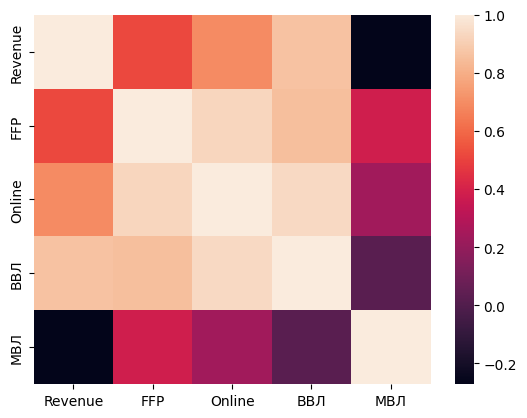

In [112]:
#построим тепловую карту для наглядности
sns.heatmap(final.corr())

Видим, что больше всего выручка зависит от клиентов с программой лояльности, онлайн продаж и билетов, проданных на внутренние рейсы. Также интересна сильная связь в том, что число онлайн продаж зависит от числа клиентов с программой лояльности, а также от внутренних перелетов.